# Feature extraction



---


Dive into my Colab notebook where I
compare feature extraction algorithms!
Witness the implementation and evaluation of SIFT, ORB, BRISK, FAST(with BRIEF), AKAZE, KAZE and Harris on a sample photo. Uncover the strengths and weaknesses of each method in extracting image features for various applications.


--2024-05-20 19:45:18--  https://cdn.britannica.com/71/99571-050-DFF0A6E5/Statue-of-Liberty-Island-New-York.jpg
Resolving cdn.britannica.com (cdn.britannica.com)... 52.85.151.120, 52.85.151.96, 52.85.151.114, ...
Connecting to cdn.britannica.com (cdn.britannica.com)|52.85.151.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 144856 (141K) [image/jpeg]
Saving to: ‘/content/Statue-of-Liberty-Island-New-York.jpg’

/content/Statue-of- 100%[===================>] 141.46K  --.-KB/s    in 0.008s  

2024-05-20 19:45:18 (18.2 MB/s) - ‘/content/Statue-of-Liberty-Island-New-York.jpg’ saved [144856/144856]



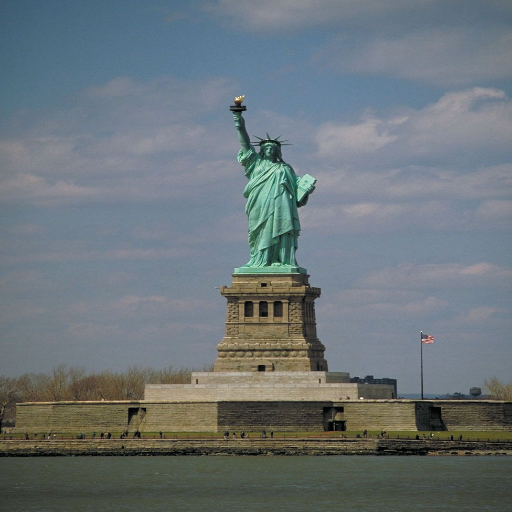

In [33]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image from a URL
image_url = "https://cdn.britannica.com/71/99571-050-DFF0A6E5/Statue-of-Liberty-Island-New-York.jpg"
image_path = "/content/Statue-of-Liberty-Island-New-York.jpg"

# Download the image
!wget -O $image_path $image_url

# Load the image
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print("Error: Image not loaded. Check the path.")
else:
    # Resize the image to a smaller size
    width = 512  # desired width
    height = 512  # desired height
    resized_image = cv2.resize(image, (width, height))

    # Display the resized image
    cv2_imshow(resized_image)


[[ 84  83  83 ... 107 106 107]
 [ 84  84  84 ... 107 107 107]
 [ 83  84  85 ... 108 106 104]
 ...
 [ 54  55  56 ...  65  67  67]
 [ 53  56  55 ...  60  65  64]
 [ 57  55  56 ...  60  59  58]]


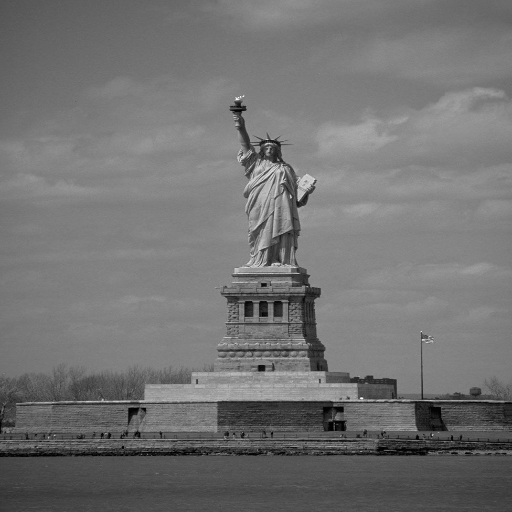

In [34]:
# Convert the image to grayscale
gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

# Print the grayscale image
print(gray)

# Display the grayscale image
cv2_imshow(gray)


Number of Keypoints (SIFT): 614


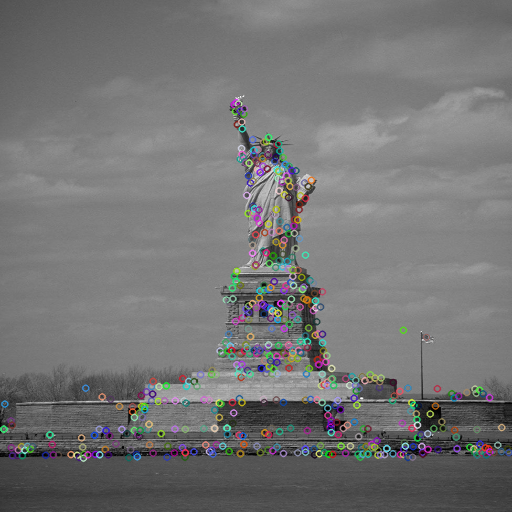

In [35]:
#@title Feature extraction using SIFT
sift = cv2.SIFT_create()
keypoints_sift, descriptors_sift = sift.detectAndCompute(gray, None)

# Print the number of keypoints detected
print("Number of Keypoints (SIFT):", len(keypoints_sift))
# Display the keypoints on the image
image_with_keypoints_sift = cv2.drawKeypoints(gray, keypoints_sift, None)

cv2_imshow(image_with_keypoints_sift)

Number of Keypoints (ORB): 500


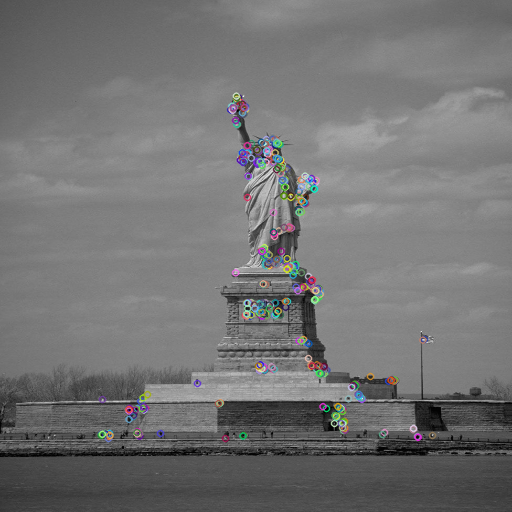

In [36]:
#@title Feature extraction using ORB
# Feature extraction using ORB
orb = cv2.ORB_create()
keypoints_orb, descriptors_orb = orb.detectAndCompute(gray, None)
# Print the number of keypoints detected
print("Number of Keypoints (ORB):", len(keypoints_orb))
# Display the keypoints
image_with_keypoints_orb = cv2.drawKeypoints(gray, keypoints_orb, None)
cv2_imshow(image_with_keypoints_orb)

Number of Keypoints (BRISK): 1292


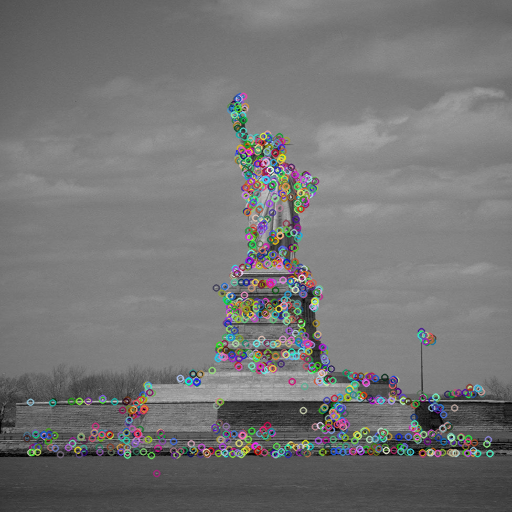

In [37]:
#@title Feature extraction using BRISK
brisk = cv2.BRISK_create()
# Detect keypoints and compute descriptors
keypoints_brisk, descriptors = brisk.detectAndCompute(gray, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(gray, keypoints_brisk, None)
print("Number of Keypoints (BRISK):", len(keypoints_brisk))
# Display the image with keypoints
cv2_imshow(image_with_keypoints)

Number of Keypoints (FAST + BRIEF): 2873


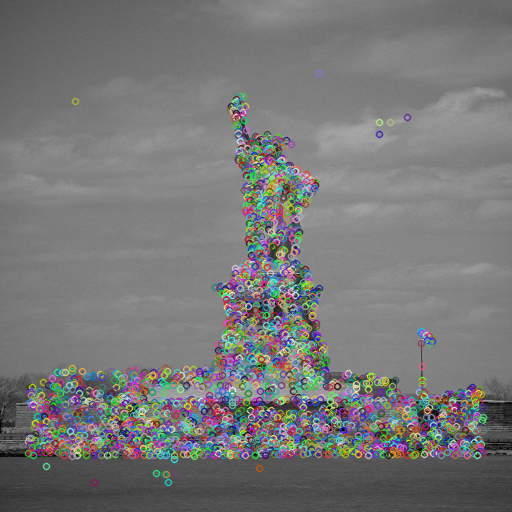

In [38]:
#@title Feature extraction using FAST (with BRIEF)

# Initialize the FAST detector
fast = cv2.FastFeatureDetector_create()
keypoints_fast = fast.detect(gray, None)

# Initialize the BRIEF descriptor extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# Compute descriptors
keypoints_fast, descriptors = brief.compute(gray, keypoints_fast)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(gray, keypoints_fast, None)

# Print the number of keypoints detected
print("Number of Keypoints (FAST + BRIEF):", len(keypoints_fast))

# Display the image with keypoints
cv2_imshow(image_with_keypoints)


Number of Keypoints (AKAZE): 342


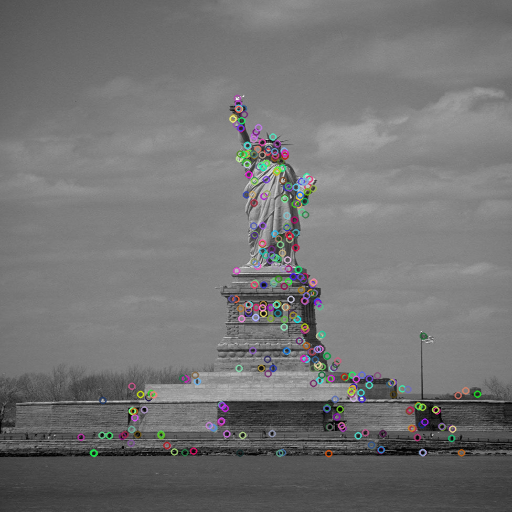

In [39]:
#@title Feature extraction using AKAZE

# Initialize the AKAZE detector
akaze = cv2.AKAZE_create()

# Detect keypoints and compute descriptorsF
keypoints_akaze, descriptors = akaze.detectAndCompute(gray, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(gray, keypoints_akaze, None)

# Print the number of keypoints detected
print("Number of Keypoints (AKAZE):", len(keypoints_akaze))

# Display the image with keypoints
cv2_imshow(image_with_keypoints)


Number of Keypoints (KAZE): 484


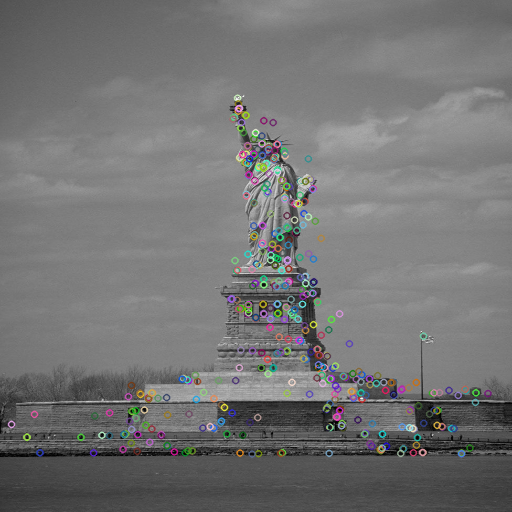

In [40]:
#@title Feature extraction using KAZE

# Initialize the KAZE detector
kaze = cv2.KAZE_create()

# Detect keypoints and compute descriptors
keypoints_kaze, descriptors = kaze.detectAndCompute(gray, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(gray, keypoints_kaze, None)

# Print the number of keypoints detected
print("Number of Keypoints (KAZE):", len(keypoints_kaze))

# Display the image with keypoints
cv2_imshow(image_with_keypoints)


Number of Keypoints (Harris): 6595


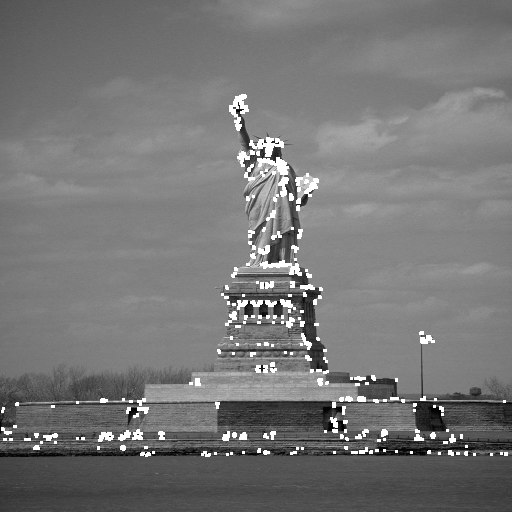

In [41]:
#@title Feature extraction using Harris Corner Detector
from google.colab.patches import cv2_imshow

# Detect Harris corners
harris_corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Dilate corner points to enhance them
harris_corners = cv2.dilate(harris_corners, None)

# Threshold for an optimal value, it may vary depending on the image
image_with_keypoints = gray.copy()
image_with_keypoints[harris_corners > 0.01 * harris_corners.max()] = 255

# Print the number of keypoints detected
num_keypoints = np.sum(harris_corners > 0.01 * harris_corners.max())
print("Number of Keypoints (Harris):", num_keypoints)

# Display the image with keypoints
cv2_imshow(image_with_keypoints)


In [42]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


# Get the number of keypoints for each detector
num_keypoints_sift = len(keypoints_sift)
num_keypoints_orb = len(keypoints_orb)
num_keypoints_brisk = len(keypoints_brisk)
num_keypoints_fast = len(keypoints_fast)
num_keypoints_akaze = len(keypoints_akaze)
num_keypoints_kaze = len(keypoints_kaze)
num_keypoints_harris = num_keypoints

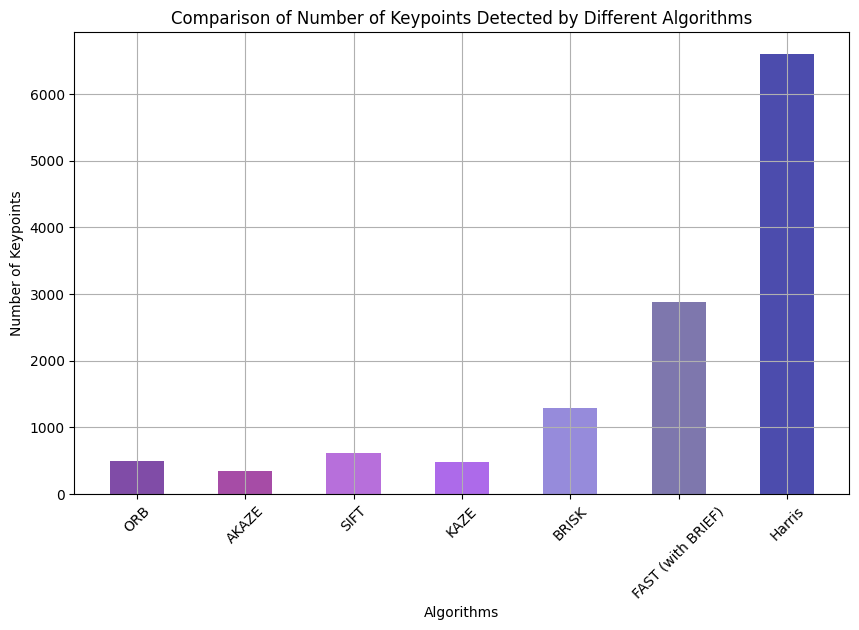

In [43]:
# Plot the results
algorithms = ['ORB', 'AKAZE', 'SIFT', 'KAZE', 'BRISK', 'FAST (with BRIEF)', 'Harris']
num_keypoints = [num_keypoints_orb, num_keypoints_akaze, num_keypoints_sift,
                 num_keypoints_kaze, num_keypoints_brisk, num_keypoints_fast, num_keypoints_harris]

purple_shades = [
    mcolors.to_rgba('#4B0082', alpha=0.7),  # Indigo
    mcolors.to_rgba('#800080', alpha=0.7),  # Purple
    mcolors.to_rgba('#9932CC', alpha=0.7),  # DarkOrchid
    mcolors.to_rgba('#8A2BE2', alpha=0.7),  # BlueViolet
    mcolors.to_rgba('#6A5ACD', alpha=0.7),  # SlateBlue
    mcolors.to_rgba('#483D8B', alpha=0.7),  # DarkSlateBlue
    mcolors.to_rgba('#00008B', alpha=0.7)   # DarkBlue
]

bar_width = 0.5
plt.figure(figsize=(10, 6))
plt.bar(algorithms, num_keypoints, color= purple_shades, width=bar_width)
plt.xlabel('Algorithms')
plt.ylabel('Number of Keypoints')
plt.title('Comparison of Number of Keypoints Detected by Different Algorithms')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**Conclusion**

---


The Harris Corner Detector emerges as the top performer, detecting the most key points among the tested algorithms. Its robustness in identifying salient features positions it as a promising choice for precise feature localization in images.